In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
df=pd.read_csv(r"C:\Users\Lenovo\Desktop\Data\PIDD Data.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnancies        768 non-null    int64  
 1   Glucose            768 non-null    int64  
 2   BloodPressure      768 non-null    int64  
 3   SkinThickness      768 non-null    int64  
 4   Insulin            768 non-null    int64  
 5   BMI                768 non-null    float64
 6   Diabetes function  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# EDA

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Diabetes function,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


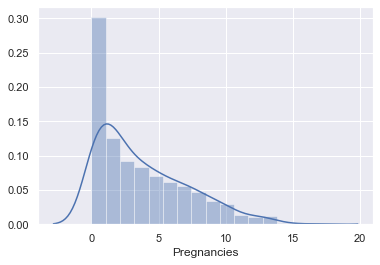

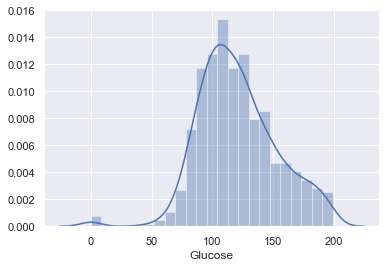

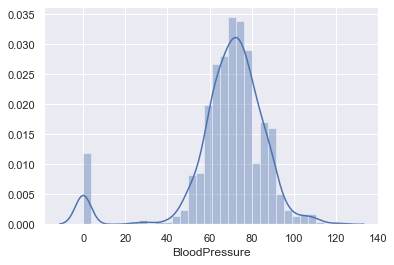

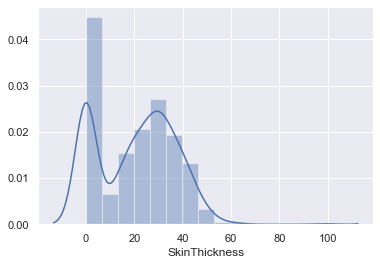

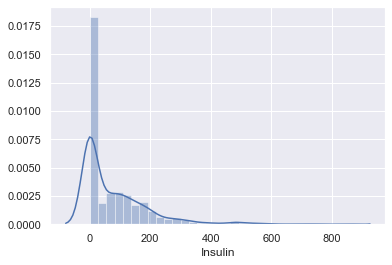

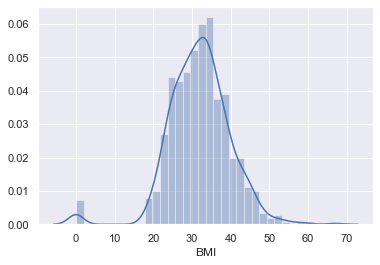

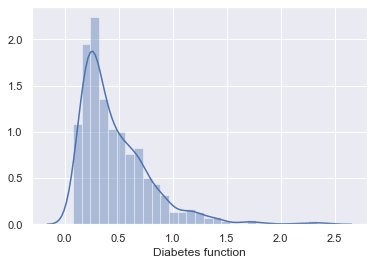

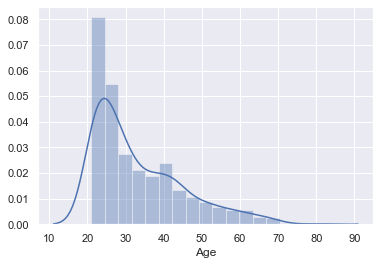

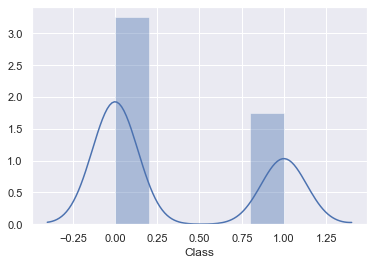

In [10]:
## Histogram Plot
df_feature=df.columns

for feature in df_feature:
    p=sns.distplot(a=df[feature])
    plt.show()

In [12]:
## Removing Zeros
df_zeros=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[df_zeros]=np.where((df[df_zeros]==0), np.nan, df[df_zeros])

In [15]:
df.isnull().sum()

Pregnancies            0
Glucose                5
BloodPressure         35
SkinThickness        227
Insulin              374
BMI                   11
Diabetes function      0
Age                    0
Class                  0
dtype: int64

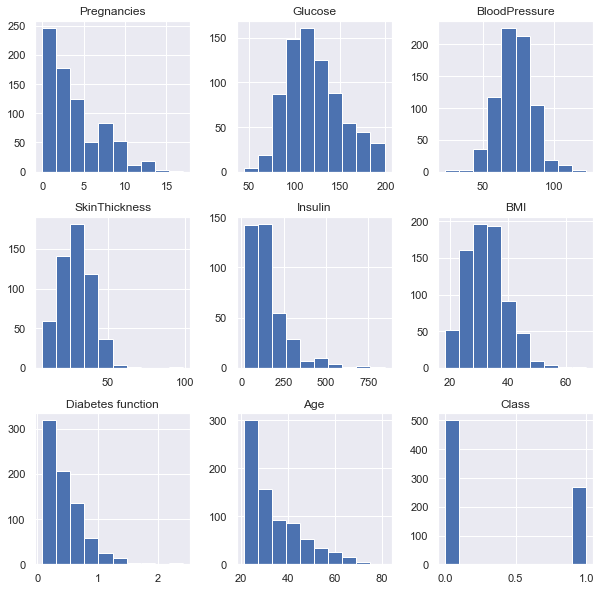

In [18]:
# Plot Histogram Of Each Feature
p=df.hist(figsize=(10,10))

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
Diabetes function,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [20]:
# Filling zeros value with Mean
df['Glucose']=df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].fillna(df['BloodPressure'].mean())

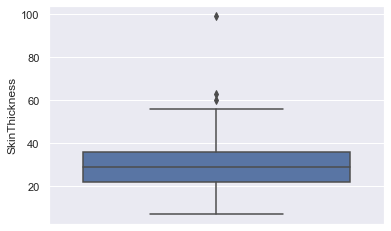

In [27]:
# Checking outlier, Mean and Median
sns.boxplot(y='SkinThickness',data=df)

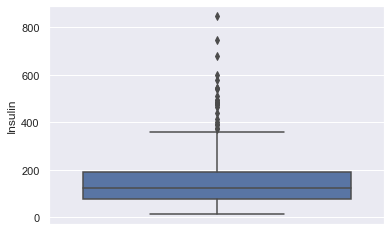

In [25]:
sns.boxplot(y='Insulin',data=df)

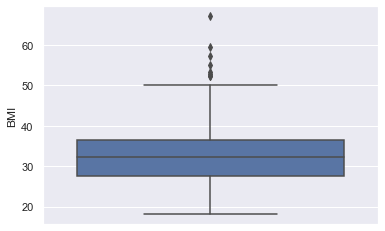

In [28]:
sns.boxplot(y='BMI',data=df)

In [29]:
# Checking Mean and Median Value
print(df['SkinThickness'].mean(), df['SkinThickness'].median()) 
print(df['Insulin'].mean(), df['Insulin'].median()) 
print(df['BMI'].mean(), df['BMI'].median()) 

29.153419593345657 29.0
155.5482233502538 125.0
32.45746367239099 32.3


In [30]:
# Filling Nan value With Median
df['SkinThickness']=df['SkinThickness'].fillna(df['SkinThickness'].median())
df['Insulin']=df['Insulin'].fillna(df['Insulin'].median())
df['BMI']=df['BMI'].fillna(df['BMI'].median())

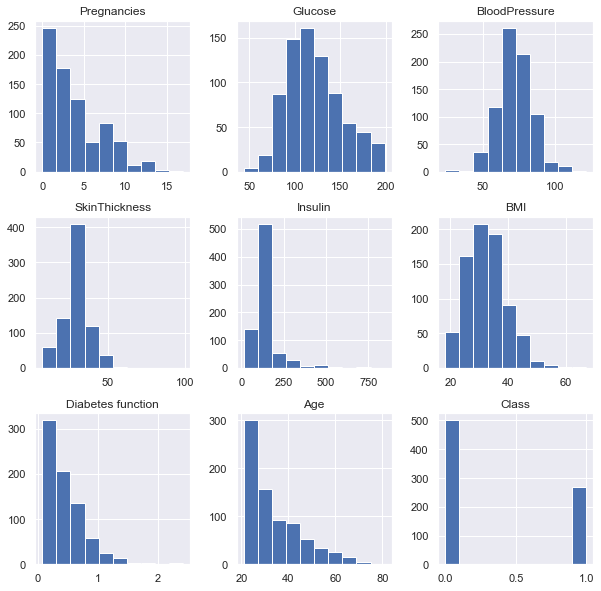

In [32]:
# After Filling Nan Value the Histogram plot
p=df.hist(figsize=(10,10))

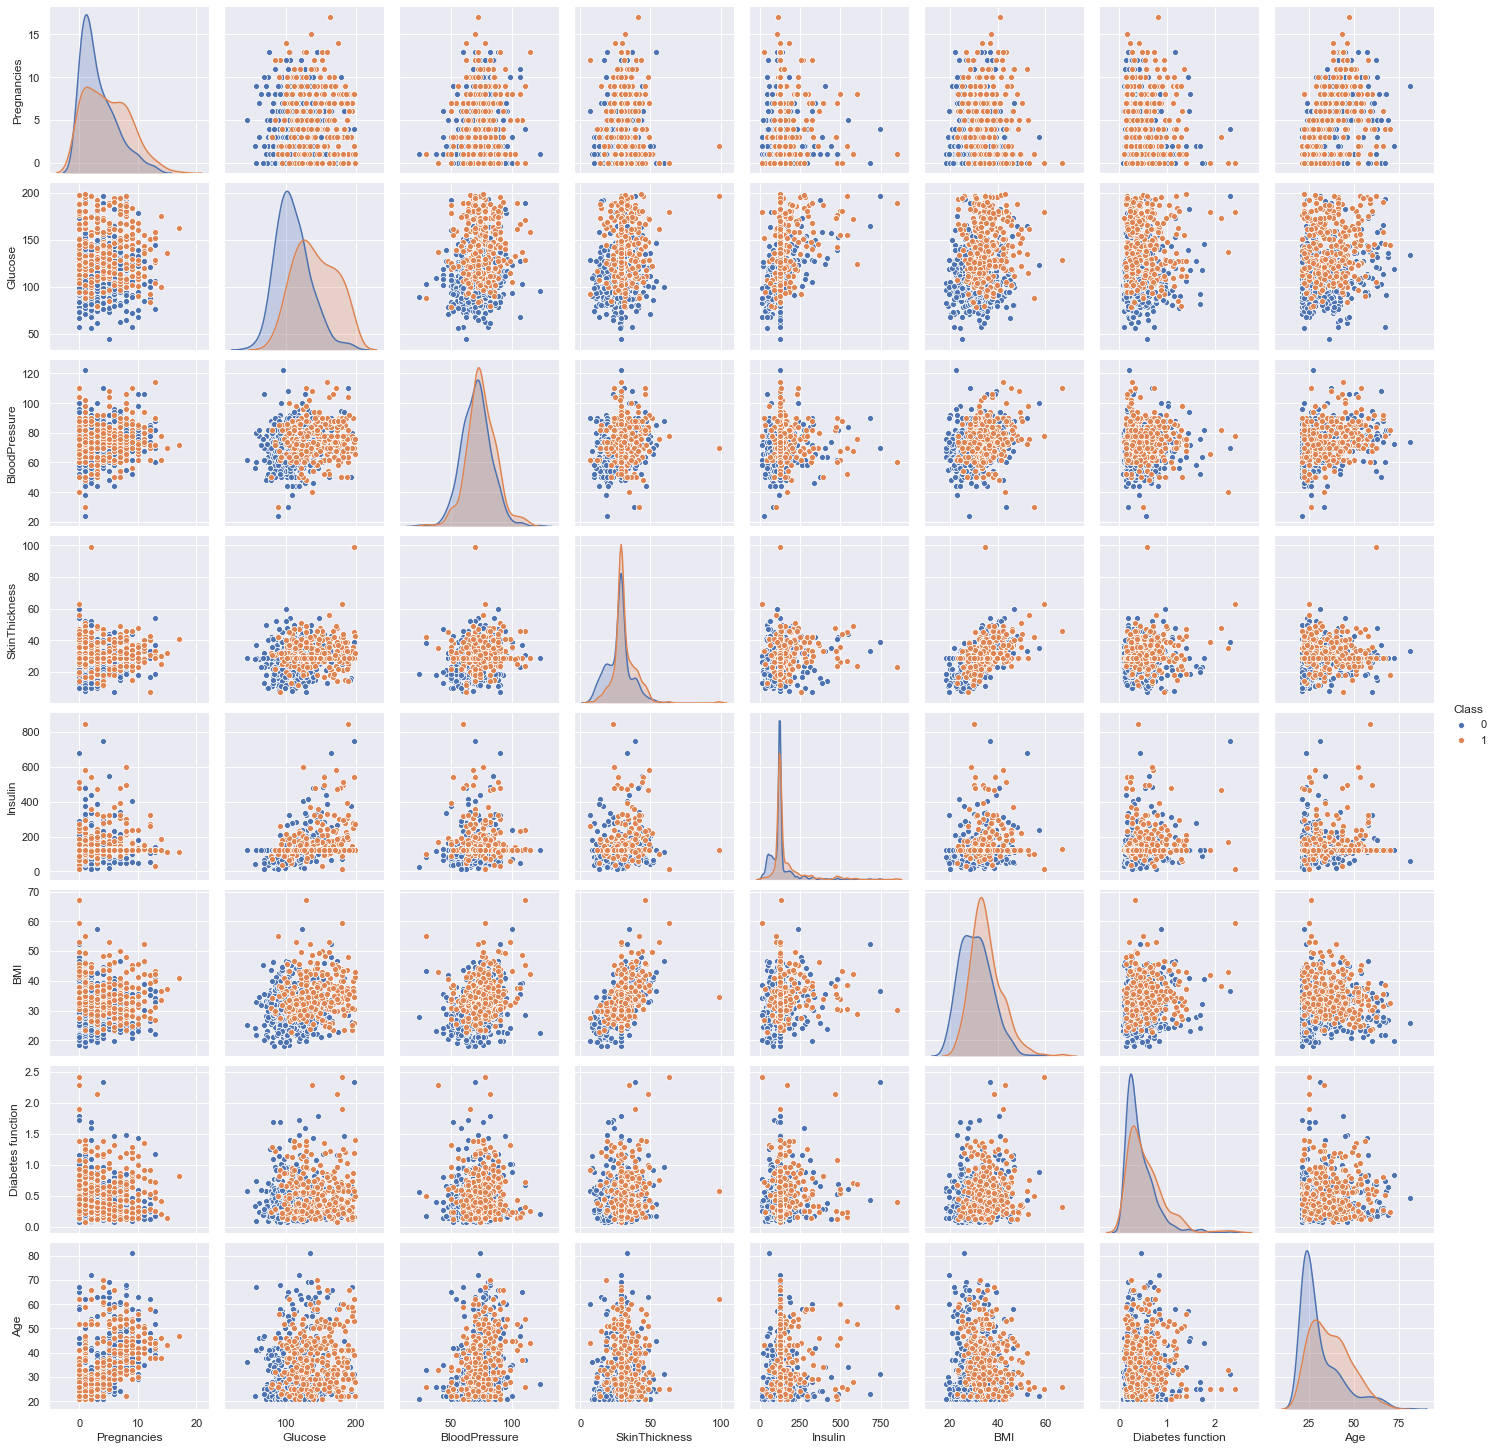

In [33]:
# Pair Plot to see all feature dependancy and distribution at time
sns.pairplot(data=df,hue='Class')
plt.show()

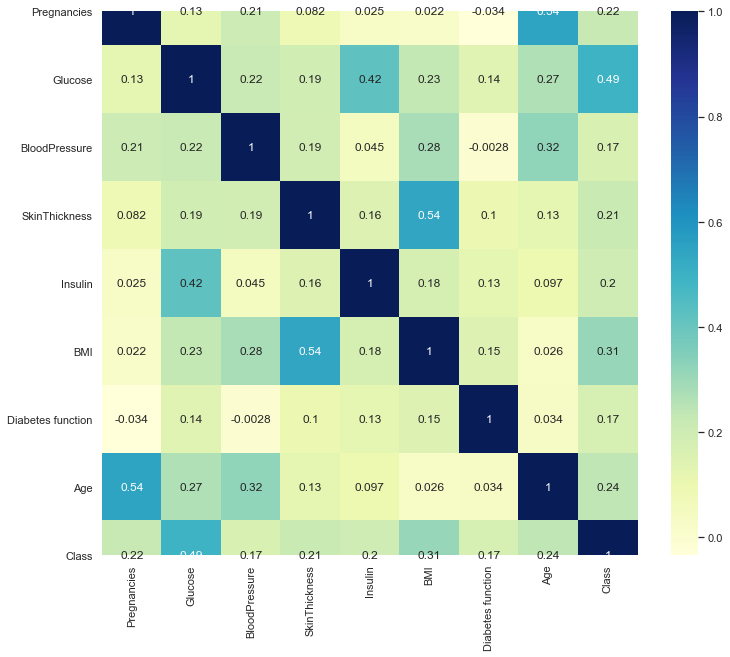

In [37]:
# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu")
plt.show()

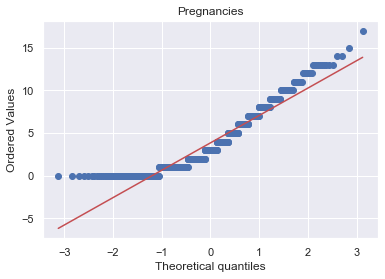

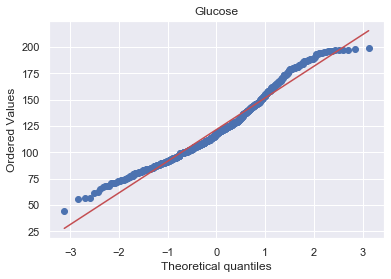

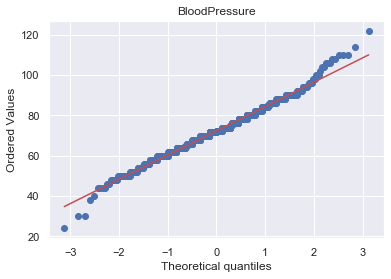

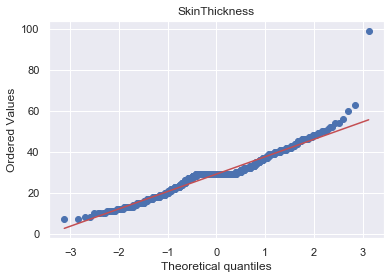

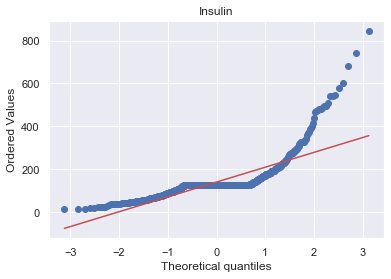

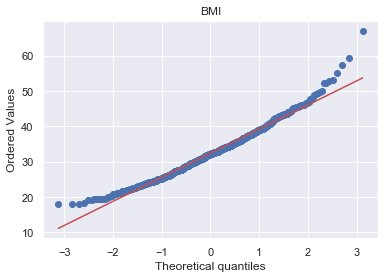

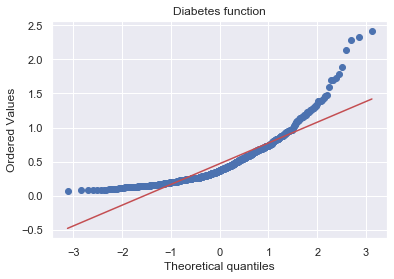

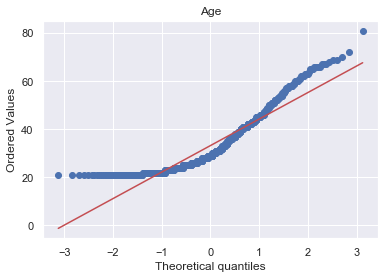

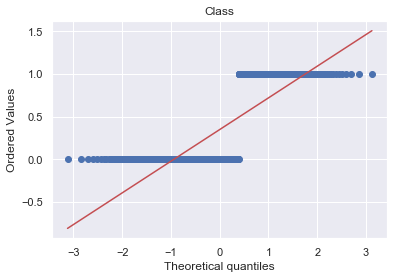

In [46]:
# stats Use to showcase the probability of different feature
import scipy
from scipy import stats
for feature in df.columns:
    stats.probplot(df[feature],plot=plt)
    plt.title(feature)
    plt.show()

# Standardizing Data

In [108]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [109]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [111]:
X=sc.fit_transform(X[:])
X

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0158134 , -0.69530596, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.29912651,
        -0.47378505, -0.87137393]])

In [112]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [113]:
# Splitting Value in Train and Test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

<IPython.core.display.Javascript object>

# Fitting Data In Various Model

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [126]:
def DTC(X_train, X_test, y_train, y_test):
    DTC= DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    DTC.fit(X_train, y_train)

    prediction=DTC.predict(X_test)
    cm = confusion_matrix(y_test, prediction)
    cr=classification_report(y_test, prediction)
    return print(f"Train score : {DTC.score(X_train, y_train)}\nTest score : {DTC.score(X_test, y_test)}\ncr: {classification_report(y_test, prediction)}\ncm : {confusion_matrix(y_test, prediction)}")

                   
def svc(X_train,X_test,y_train,y_test):
    svc=SVC(kernel='rbf')
    svc.fit(X_train,y_train)
    
    prediction=svc.predict(X_test)
    cm=confusion_matrix(y_test,prediction)
    cr=classification_report(y_test, prediction)
    return print(f"Train score : {svc.score(X_train, y_train)}\nTest score : {svc.score(X_test, y_test)}\ncr:{classification_report(y_test, prediction)}\ncm : {confusion_matrix(y_test, prediction)}")
                    

def NC(X_train, X_test, y_train, y_test):
    NC= GaussianNB()
    NC.fit(X_train, y_train)

    prediction=NC.predict(X_test)
    cm = confusion_matrix(y_test, prediction)
    cr=classification_report(y_test, prediction)
    return print(f"Train score : {NC.score(X_train, y_train)}\nTest score : {NC.score(X_test, y_test)}\ncr: {classification_report(y_test, prediction)}\ncm : {confusion_matrix(y_test, prediction)}")
                   

def knc(X_train, X_test, y_train, y_test):
    knc=KNeighborsClassifier(metric = 'minkowski', p = 2)
    knc.fit(X_train, y_train)

    prediction=knc.predict(X_test)
    cm=confusion_matrix(y_test, prediction)
    cr=classification_report(y_test, prediction)
    return print(f"Train score : {knc.score(X_train, y_train)}\nTest score : {knc.score(X_test, y_test)}\ncr: {classification_report(y_test, prediction)}\ncm : {confusion_matrix(y_test, prediction)}")
                   

def rfc(X_train, X_test, y_train, y_test):
    rfc=RandomForestClassifier(criterion = 'entropy', random_state = 0)
    rfc.fit(X_train, y_train)

    prediction=rfc.predict(X_test)
    cm=confusion_matrix(y_test, prediction)
    cr=classification_report(y_test, prediction)
    return print(f"Train score : {rfc.score(X_train, y_train)}\nTest score : {rfc.score(X_test, y_test)}\ncr: {classification_report(y_test, prediction)}\ncm : {confusion_matrix(y_test, prediction)}")
                   

In [127]:
def print_score(X_train, X_test, y_train, y_test):
    print("SVC:\n")
    svc(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("kNN:\n")
    knc(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Naive:\n")
    NC(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("DTC:\n")
    DTC(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("RF:\n")
    rfc(X_train, X_test, y_train, y_test)

In [128]:
print_score(X_train,X_test,y_train,y_test)

SVC:

Train score : 0.8224755700325733
Test score : 0.7272727272727273
cr:              precision    recall  f1-score   support

           0       0.79      0.79      0.79       100
           1       0.61      0.61      0.61        54

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

cm : [[79 21]
 [21 33]]
----------------------------------------------------------------------------------------------------

kNN:

Train score : 0.8224755700325733
Test score : 0.6948051948051948
cr:               precision    recall  f1-score   support

           0       0.78      0.73      0.76       100
           1       0.56      0.63      0.59        54

    accuracy                           0.69       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.71      0.69      0.70       154

cm : [[73 27]
 [20 34]]
-----------------------------------------------

# Getting probability & Evaluating FPR, TPR, Threshold

In [140]:
rfc=RandomForestClassifier(criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train)
prediction=rfc.predict(X_test)

cm=confusion_matrix(y_test, prediction)
cm

array([[78, 22],
       [16, 38]], dtype=int64)

In [141]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       100
           1       0.63      0.70      0.67        54

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



In [142]:
prediction_prob=rfc.predict_proba(X_test)[:,1]
prediction_prob

array([0.44, 0.77, 0.81, 0.62, 0.26, 0.54, 0.29, 0.17, 0.21, 0.47, 0.12,
       0.14, 0.82, 0.2 , 0.1 , 0.01, 0.2 , 0.13, 0.66, 0.34, 0.11, 0.87,
       0.03, 0.23, 0.15, 0.56, 0.88, 0.16, 0.82, 0.34, 0.88, 0.06, 0.53,
       0.1 , 0.64, 0.  , 0.06, 0.21, 0.22, 0.15, 0.03, 0.23, 0.79, 0.11,
       0.65, 0.47, 0.49, 0.19, 0.8 , 0.44, 0.04, 0.12, 0.02, 0.64, 0.41,
       0.52, 0.87, 0.86, 0.06, 0.89, 0.47, 0.69, 0.4 , 0.8 , 0.19, 0.6 ,
       0.69, 0.39, 0.9 , 0.75, 0.64, 0.29, 0.05, 0.48, 0.04, 0.04, 0.44,
       0.77, 0.93, 0.41, 0.07, 0.01, 0.41, 0.03, 0.9 , 0.45, 0.32, 0.2 ,
       0.7 , 0.64, 0.47, 0.01, 0.59, 0.02, 0.06, 0.07, 0.12, 0.52, 0.79,
       0.42, 0.82, 0.67, 0.87, 0.01, 0.11, 0.74, 0.67, 0.23, 0.83, 0.88,
       0.  , 0.8 , 0.83, 0.25, 0.1 , 0.78, 0.63, 0.43, 0.8 , 0.01, 0.74,
       0.06, 0.12, 0.09, 0.51, 0.79, 0.11, 0.16, 0.34, 0.3 , 0.18, 0.16,
       0.85, 0.27, 0.11, 0.16, 0.71, 0.59, 0.02, 0.79, 0.13, 0.21, 0.56,
       0.03, 0.26, 0.5 , 0.89, 0.78, 0.42, 0.27, 0.

In [146]:
# Evaluating FPR, TPR, Threshold
fpr, tpr, threshold = roc_curve(y_test, prediction_prob)
print("FPR:\n\n", fpr)

print("-"*100)

print("TPR:\n\n", tpr)

FPR:

 [0.   0.01 0.02 0.02 0.02 0.03 0.03 0.04 0.05 0.05 0.09 0.12 0.12 0.12
 0.13 0.13 0.14 0.16 0.16 0.17 0.2  0.2  0.2  0.21 0.21 0.21 0.22 0.22
 0.23 0.23 0.23 0.24 0.26 0.26 0.28 0.3  0.31 0.31 0.33 0.35 0.36 0.4
 0.41 0.42 0.44 0.45 0.47 0.5  0.51 0.53 0.57 0.59 0.6  0.63 0.66 0.71
 0.74 0.75 0.77 0.82 0.83 0.86 0.9  0.93 0.98 1.  ]
----------------------------------------------------------------------------------------------------
TPR:

 [0.         0.         0.01851852 0.05555556 0.11111111 0.14814815
 0.18518519 0.2037037  0.25925926 0.27777778 0.27777778 0.2962963
 0.37037037 0.38888889 0.40740741 0.42592593 0.42592593 0.46296296
 0.48148148 0.48148148 0.51851852 0.57407407 0.61111111 0.62962963
 0.66666667 0.7037037  0.7037037  0.72222222 0.72222222 0.74074074
 0.81481481 0.81481481 0.83333333 0.85185185 0.85185185 0.87037037
 0.87037037 0.88888889 0.90740741 0.90740741 0.90740741 0.90740741
 0.92592593 0.92592593 0.94444444 0.94444444 0.96296296 0.96296296
 0.98148148 0.9

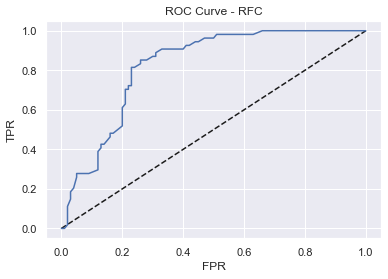

In [149]:
# Plotting ROC Curve
plt.plot([0, 1], [0, 1], "k--", label = '50% AUC')
plt.plot(fpr, tpr, label = "RFC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve - RFC")
plt.show()

In [147]:
# ROC Score
roc_auc_score(y_test,prediction_prob)

0.8236111111111111

# Hyperparameter Tunning

In [157]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
print(accuracies.mean(), accuracies.std())

0.7638815441565309 0.04069034120160408


In [158]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [25, 50, 200, 300],
               'criterion': ['gini', 'entropy'],
                'max_depth': [14, 20, 25, 30]
              }

In [159]:
grid_search = GridSearchCV(estimator = rfc,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)

print('best_accuracy = ',grid_search.best_score_)
print('best_parameters = ', grid_search.best_params_)

best_accuracy =  0.7801692226335273
best_parameters =  {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 200}


In [164]:
prediction=grid_search.predict(X_test)

In [165]:
print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       100
           1       0.64      0.70      0.67        54

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154

[[79 21]
 [16 38]]


# Saving Pickle Model

In [166]:
import pickle
file=open('diseases.pkl','wb')
pickle.dump(grid_search,file)

In [167]:
model = open('diseases.pkl','rb')
forest = pickle.load(model)

In [168]:
prediction=grid_search.predict(X_test)

In [169]:
confusion_matrix(y_test,prediction)

array([[79, 21],
       [16, 38]], dtype=int64)